# MoMA Project Analysis

The goal of this analysis is to analyze MoMA data to determine artist gender diversity from the museum's inception to the present. In addition, to compare the MoMA diversity data with the art history textbook data. In this analysis, I will also include visualizations using matplotlib and seaborn. In this analysis, I will attempt to do the following:
1. Calculate the percentage of artists represented in MoMA's collection (male, female, non-binary, non-conforming and transgender), and create a visualization of these percentages in a bar chart.
2. Use a times series analysis to determine whether or not MoMA's artist gender diversity improved over time, and create a visualization of these total gender number changes on a line graph. 
3. Determine if the gender diversity improved after the museum's 2019 renovation and expansion, and create a visualization of these percentages in a bar chart.  
4. Calculate the percentage of male and female artists represented in the art history textbooks (from our discovery portion of the project, we know that there are no non-binary, non-conforming, or transgender artists represented in these textbooks), and create a visualization of these percentages in a pie chart. 
5. Join the MoMA and art history textbook data sets to determine how many artists represented in MoMA's collection are also listed in the art history textbooks. 

First, I will read in the clean MoMA data: 

In [1]:
import pandas as pd

# Reading in the MoMA clean data csv and viewing the first five rows. 
moma_analyze = pd.read_csv("../data/clean/clean_artworks.csv")
moma_analyze.head(5)

,title,artist,date_acquired,gender_list
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,1996-04-09,(male)
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,1995-01-17,(male)
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,1997-01-15,(male)
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,1995-01-17,(male)
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,1997-01-15,(male)


As a reminder, I will view the gender counts for the MoMA clean data.

In [2]:
moma_analyze['gender_list'].value_counts().to_frame()

,count
gender_list,
(male),130515
(female),21943
(transgender),63
(non-binary),17
(non-conforming),2


1. Next, I will calculate the percentage of each gender.

In [3]:
gender_counts = moma_analyze['gender_list'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
print(gender_percentages)

gender_list
(male)              85.561164
(female)            14.385079
(transgender)        0.041301
(non-binary)         0.011145
(non-conforming)     0.001311
Name: count, dtype: float64


Next, I will visualize these percentages in a pie chart using matplotlib and seaborn. 

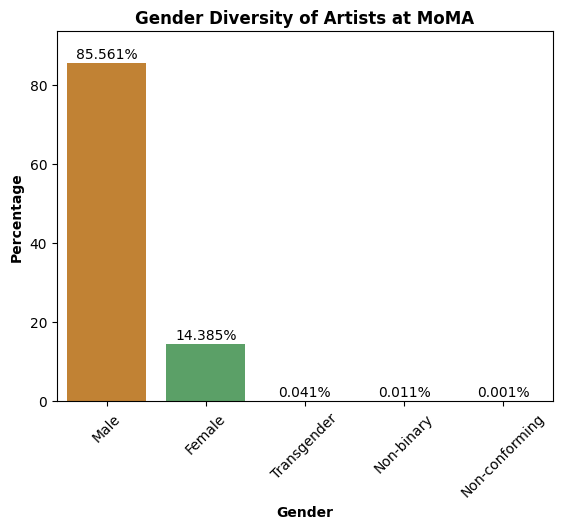

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating custom colors. 
custom_colors=['#d9851c', '#50ab5f', '#7556a2', '#d3cb29', '#83b9bd']
# Creating the bar chart. Had to set hue to x to avoid deprecated warning.
ax_1 = sns.barplot(x=gender_percentages.index, y=gender_percentages.values, hue=gender_percentages.index, palette=custom_colors, legend=False)

# This will add percentages to each bar in the chart. Had to use 3 decimal places because the transgender, 
# non-binary, and non-conforming populations were so small. 
for i, percentage in enumerate(gender_percentages.values):
    ax_1.text(i, percentage + 0.5, f'{percentage:.3f}%', ha='center', va='bottom', fontsize=10)

# This section customizes the bar chart. 
plt.title('Gender Diversity of Artists at MoMA', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylim(0, max(gender_percentages.values) + 8)  # This will add space to the top of the bars. 
plt.xticks(rotation=45) # This will rotate the x axis labels.
ax_1.set_xticks([0, 1, 2, 3, 4]) # Had to add due to warning. 
ax_1.set_xticklabels(['Male', 'Female', 'Transgender', 'Non-binary', 'Non-conforming']) 
# This will update the x axis labels (remove parentheses and capitalize). 
plt.show()

This bar chart allows us to visualize the large disparity between the genders represented at MoMA.

2. Next, I will start my time series analysis to determine if MoMA's gender diversity improved over time. 

In [5]:
# Even though date_acquired was changed to a datetime in the data cleaning process, 
# I continued to receive an error that it was not a datetime. Trying this method to see if I can fix it. 
moma_analyze['date_acquired'] = pd.to_datetime(moma_analyze['date_acquired'], errors='coerce')

In [6]:
# Double checking to make sure I don't have any missing dates. I already did this in the cleaning process. 
moma_analyze['date_acquired'].isna().sum()

np.int64(0)

In [ ]:
# First, I need to get the years from the date_acquired column.
moma_analyze['year_acquired'] = moma_analyze['date_acquired'].dt.year

# Next, I can use groupby to see how many pieces of art were acquired each year, for each gender. 
gender_per_year = moma_analyze.groupby(['year_acquired', 'gender_list']).size().unstack(fill_value=0)
print(gender_per_year)


gender_list    (female)  (male)  (non-binary)  (non-conforming)  (transgender)
year_acquired                                                                 
1929                  0       9             0                 0              0
1930                  0       7             0                 0              0
1931                  0       3             0                 0              0
1932                  1      18             0                 0              0
1933                  0      93             0                 0              0
...                 ...     ...           ...               ...            ...
2020                207    2482             1                 0              0
2021                559     472             0                 0              0
2022                400     329             0                 0              0
2023                234     408             0                 0              1
2024                141     327             0       

Next, I will create a line graph to visualize this change over time. 

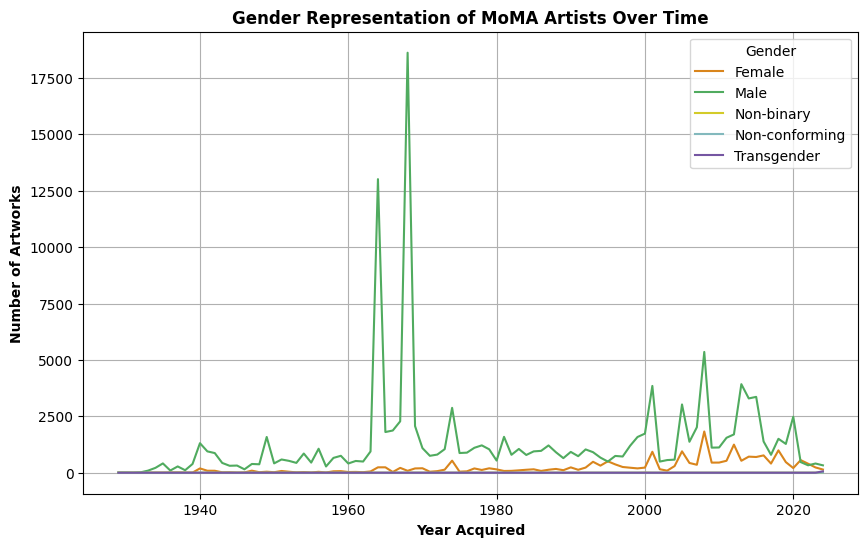

In [9]:
# Creating custom colors and labels to match the bar chart. 
custom_colors_2 =['#d9851c', '#50ab5f', '#d3cb29', '#83b9bd', '#7556a2']
custom_labels = ['Female', 'Male', 'Non-binary', 'Non-conforming', 'Transgender']

# Creating the line graph with the custom colors and thicker line. 
ax_2 = gender_per_year.plot(kind='line', figsize=(10, 6), color=custom_colors_2, linewidth=1.5)

plt.title('Gender Representation of MoMA Artists Over Time', fontweight='bold')
plt.xlabel('Year Acquired', fontweight='bold')
plt.ylabel('Number of Artworks', fontweight='bold')
plt.legend(custom_labels, title='Gender') # Using the custom_labels to remove parentheses from data set. 
plt.grid(True)
plt.show()

3. Next, I want to see if gender diversity improved after the museum's renovation and expansion in 2019. The museum reopened in October 2019. Therefore, I will compare gender diversity percentages before and after October 2019. 

In [12]:
# First, I need to get the years and months from the date_acquired column.
moma_analyze['year'] = moma_analyze['date_acquired'].dt.year
moma_analyze['month'] = moma_analyze['date_acquired'].dt.month

In [37]:
# Here I am creating a before_or_after column to show if the date_acquired is before or after October 2019.
# I used ChatGPT to assist me with the lamda line of code and with the pd.Categorical code below. 
# However, I had to adjust the ChatGPT recommended code to get it to work. 
moma_analyze['before_or_after'] = moma_analyze.apply(
    lambda row: 'before' if (row['year'] < 2019 or (row['year'] == 2019 and row['month'] < 10)) 
   else 'after', axis=1
)

# I had to add this section of code because my bar chart was showing before and after out of order. 
# Creating these categories solved this issue. As noted above, I used ChatGPT to assist me with this section of code. 
moma_analyze['before_or_after'] = pd.Categorical(
    moma_analyze['before_or_after'], 
    categories=['before', 'after'], 
    ordered=True
)

# This uses groupby to count the before or after column and artists genders.
# I kept getting a warning about observed=False being deprecated in future versions of pandas. To solve this ...
# ... issue, I had to add "observed=True" in my groupby. This means that only categories in the data are being considered.
gender_numbers = moma_analyze.groupby(['before_or_after', 'gender_list'], observed=True).size().unstack(fill_value=0)


# This calculates the percentages for each gender. 
gender_percentages_2 = gender_numbers.div(gender_numbers.sum(axis=1), axis=0) * 100
print(gender_percentages_2)


gender_list       (female)     (male)  (non-binary)  (non-conforming)  \
before_or_after                                                         
before           13.683951  86.303716      0.010963           0.00137   
after            29.918033  69.110504      0.015179           0.00000   

gender_list      (transgender)  
before_or_after                 
before                0.000000  
after                 0.956284  


Next, I will create a bar chart to compare the gender percentages before and after the museum's 2019 renovation and expansion. 

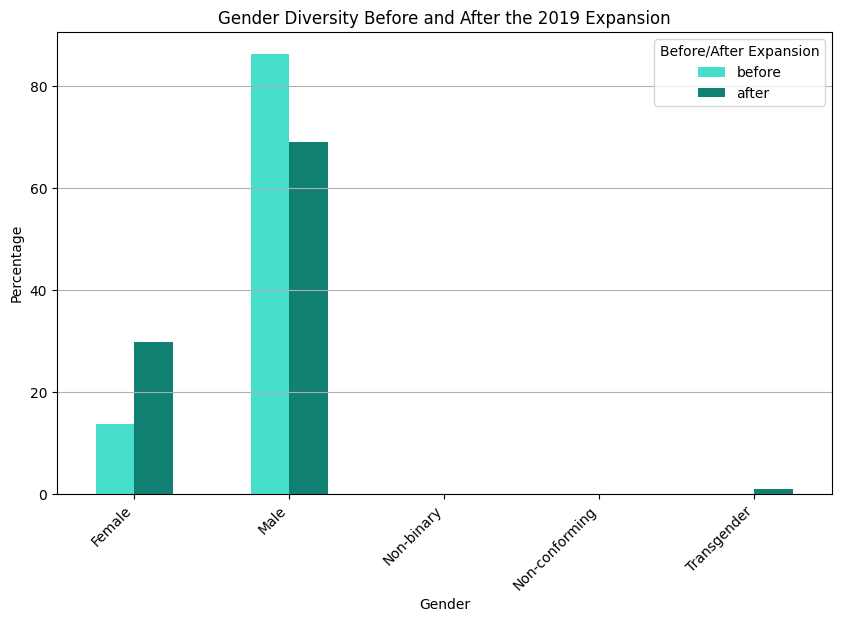

In [38]:
# Creating custom colors.
custom_colors_3=['#47decc', '#0f8072']
# Creating custom labels.
custom_labels_2 = ['Female', 'Male', 'Non-binary', 'Non-conforming', 'Transgender']

# Creating the bar chart. 
ax_3 = gender_percentages_2.T.plot(kind='bar', figsize=(10, 6), color=custom_colors_3) # Adding custom colors.
plt.title('Gender Diversity Before and After the 2019 Expansion')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Before/After Expansion')
plt.xticks(rotation=0)
ax_3.set_xticklabels(custom_labels_2, rotation=45, ha='right') # Adding custom labels, and rotating to fit.  
plt.grid(axis='y')
plt.show()

This bar chart allows us to see about a 15% improvement for female representation in the museum's collection after the 2019 expansion. In addition, we can see that the museum began to collect artworks by transgender artists after 2019. 

Now, I will read in my clean textbook csv. 

In [39]:
# Reading in the art history textbook clean data csv and viewing the first five rows. 
textbook_analyze = pd.read_csv("../data/clean/clean_art_history.csv")
textbook_analyze.head(5)

,artist_name,artist_gender
0,Aaron Douglas,Male
1,Aaron Douglas,Male
2,Aaron Douglas,Male
3,Aaron Douglas,Male
4,Aaron Douglas,Male


As a reminder, I will view the gender counts for the art history textbook clean data.

In [40]:
textbook_analyze['artist_gender'].value_counts().to_frame()

,count
artist_gender,
Male,2762
Female,342


4. Next, I will calculate the percentages of male and female artists represented in the art history textbook data set. 

In [41]:
gender_sum = textbook_analyze['artist_gender'].value_counts()
gender_percentages_textbook = gender_sum / gender_sum.sum() * 100
print(gender_percentages_textbook)

artist_gender
Male      88.981959
Female    11.018041
Name: count, dtype: float64


Next, I will create a pie chart to compare these percentages.

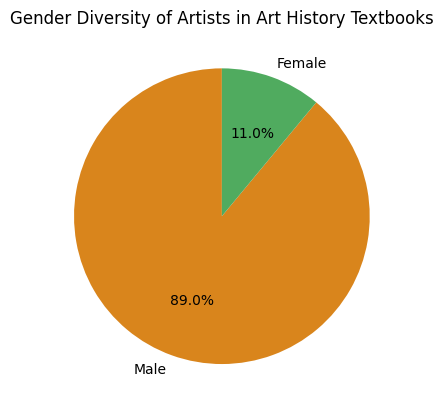

In [ ]:
# Creating custom colors.
custom_colors_4=['#d9851c', '#50ab5f']

# Defining the data (gender percentages) and labels for the pie chart. 
data = gender_percentages_textbook  
labels = gender_percentages_textbook.index 

# Creating the pie chart with custom colors to match the MoMA percentages bar chart. 
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=custom_colors_4)
plt.title('Gender Diversity of Artists in Art History Textbooks')
plt.show()